### Title: A Machine Learning Approach to SMS Spam Detection

Currently, the use of cell phones has surged in the last decade, leading, among other things, to a problem regarding text messages with promotions from unscrupulous marketing agents, and with fraudulent messages that can lead us to have a bad day. To solve this problem, in this project we will focus building a m achine learning model that accurately allows us to predict and identify when a received text message is spam or not (ham), with the help of the text body of SMS, while using a [SMS Spam Collection Dataset from kaggle.com](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) with a total of 5,169 unique and legitimate text messages downloaded fro m the Kaggle website.

**Objectives:**

* Analyze the provided SMS dataset to understand the characteristics of spam and
legitimate (ham) messages.
* Explore the content of messages, examining factors like message length, common words,
and phrases.
* Develop and train a spam detection model using a machine learning algorithm.
* Assess the performance of the model through testing and validation.
* Implement the trained model to classify new messages and measure its accuracy in

In [224]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [225]:
# Importing the dataset
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


> Notice that there are three columns almost empty: `Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4`. Let's check unique values for these columns and be sure what we have here.

In [227]:
df['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [228]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [229]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

> As we saw here, these are reply messages for the initial one. So there is no relevant information here and we can drop these three columns.

#### Data Preprocessing

In [230]:
# removing unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [231]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
# changing v1 column to spam and text column to text
df = df.rename(columns={"v1": "spam", "v2": "text"})
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [233]:
# Count of duplicated rows
df.duplicated().sum()

403

> There are 403 duplicated rows to drop.

In [234]:
#removing duplicates
df = df.drop_duplicates()
df.shape

(5169, 2)

> At this point I would like to understand better the features and the dataset in overall by plotting a few Graphs.
I woul like to start by checking whether the dataset is balanced or not in terms of the outcome variable `v1`.

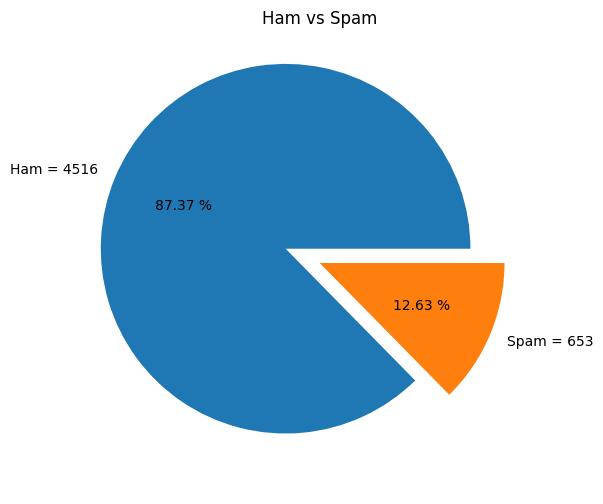

In [235]:
# sns.countplot(x='spam', data=df, orient='v')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.title('Number of ham and spam messages')
# plt.show()

number_of_spam = df[df['spam'] == 'spam'].shape[0]
number_of_ham = df[df['spam'] == 'ham'].shape[0]

plt.figure(figsize=(7,6))

mail_categories = [number_of_ham, number_of_spam]
labels = [f"Ham = {number_of_ham}", f"Spam = {number_of_spam}"]
explode = [.2, 0]

plt.pie(mail_categories, labels=labels, explode=explode, autopct="%.2f %%")
plt.title("Ham vs Spam")

plt.show()

In [236]:
# Removing punctuation
import string
string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)
df.head()

,spam,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


#### Feature Engineering

> Following data cleaning, we proceed to feature engineering. The initial step entails encoding the 'spam' feature using scikit-learn's LabelEncoder class.

In [237]:
# Using sci-kit learn to label encode the spam column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['spam'] = le.fit_transform(df['spam'])
df.head()

,spam,text
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


> To enrich the model's feature set, we can introduce two additional numerical features: word count and message length

In [238]:
# Column to represent the length of the text
df['length'] = df['text'].apply(len)
df.head()

,spam,text,length
0,0,Go until jurong point crazy Available only in ...,102
1,0,Ok lar Joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149
3,0,U dun say so early hor U c already then say,43
4,0,Nah I dont think he goes to usf he lives aroun...,59


In [239]:
# Column with the number of words

def count_words(text):
    return len(text.split())

df['words'] = df['text'].apply(count_words)
df.head()

,spam,text,length,words
0,0,Go until jurong point crazy Available only in ...,102,20
1,0,Ok lar Joking wif u oni,23,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28
3,0,U dun say so early hor U c already then say,43,11
4,0,Nah I dont think he goes to usf he lives aroun...,59,13


**Word tokenization:**

> Word tokenization, in the context of Natural Language Processing (NLP), is the process of splitting a piece of text into smaller units called tokens. The tokenizer splits the text based on predefined rules or delimiters. The most common delimiter is a whitespace character (space, tab, newline, etc.), resulting in individual words as tokens.

In [240]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (do this only once)
nltk.download('punkt')

def tokenize_text_nltk(text):
  # Lowercase the text
  text = text.lower()
  # Tokenize using NLTK word_tokenize
  tokens = word_tokenize(text)
  return tokens

df['tokens_nltk'] = df['text'].apply(tokenize_text_nltk)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,spam,text,length,words,tokens_nltk
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, i, dont, think, he, goes, to, usf, he, l..."


**Removing Stop Words:**

> In Natural Language Processing (NLP), removing stop words is a technique where you eliminate frequently occurring, generic words from your text data. These stop words typically don't contribute much to the core meaning of a sentence and can even add noise to your analysis.

In [241]:
# removing stopwords

from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df['tokens_nltk'] = df['tokens_nltk'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,spam,text,length,words,tokens_nltk
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, early, hor, u, c, already, say]"
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, dont, think, goes, usf, lives, around, t..."


> Now let's add a new column to count the number of words after having removed the stop words.

In [242]:
# Column with the number of words for nltk tokens

def count_words_nltk(tokens):
    return len(tokens)

df['words_nltk'] = df['tokens_nltk'].apply(count_words_nltk)
df.head()

,spam,text,length,words,tokens_nltk,words_nltk
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, jurong, point, crazy, available, bugis, n...",16
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, early, hor, u, c, already, say]",9
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, dont, think, goes, usf, lives, around, t...",8


> Note that the number of words decreased so we now have a cleaner text message.

**Lemmatization:** 
> In this step, Lemmatization uses a dictionary and morphological analysis to map a word to its base form, called a lemma. It considers the part of speech of the word and aims to identify the canonical form used in the dictionary. Lemmatization goes a step further, considering the part of speech (e.g., "better" becomes "good"). 

In [243]:
# Stemming/Lemmatization: using NLTK
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources 
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() 

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df['lemmatized'] = df['tokens_nltk'].apply(lemmatize_text)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,spam,text,length,words,tokens_nltk,words_nltk,lemmatized
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, jurong, point, crazy, available, bugis, n...",16,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]",6,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, early, hor, u, c, already, say]",9,"[u, dun, say, early, hor, u, c, already, say]"
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, dont, think, goes, usf, lives, around, t...",8,"[nah, dont, think, go, usf, life, around, though]"


In [244]:
# Convert lemmatized tokens back to text

def tokens_to_text(tokens):
    return ' '.join(tokens)

df['lemmatized_text'] = df['lemmatized'].apply(tokens_to_text)
df.head()

,spam,text,length,words,tokens_nltk,words_nltk,lemmatized,lemmatized_text
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, jurong, point, crazy, available, bugis, n...",16,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]",6,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, early, hor, u, c, already, say]",9,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, dont, think, goes, usf, lives, around, t...",8,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


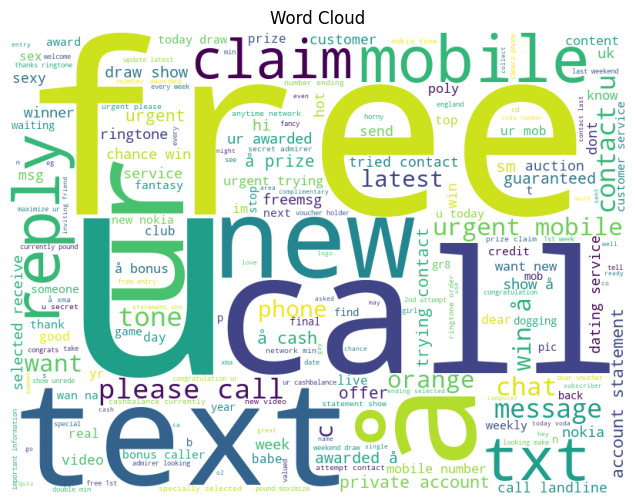

In [254]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_spam = df[df['spam'] == 1]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Generate the word cloud
wordcloud.generate(df_spam['lemmatized_text'].to_string())

# Create a figure and display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud")
plt.show()

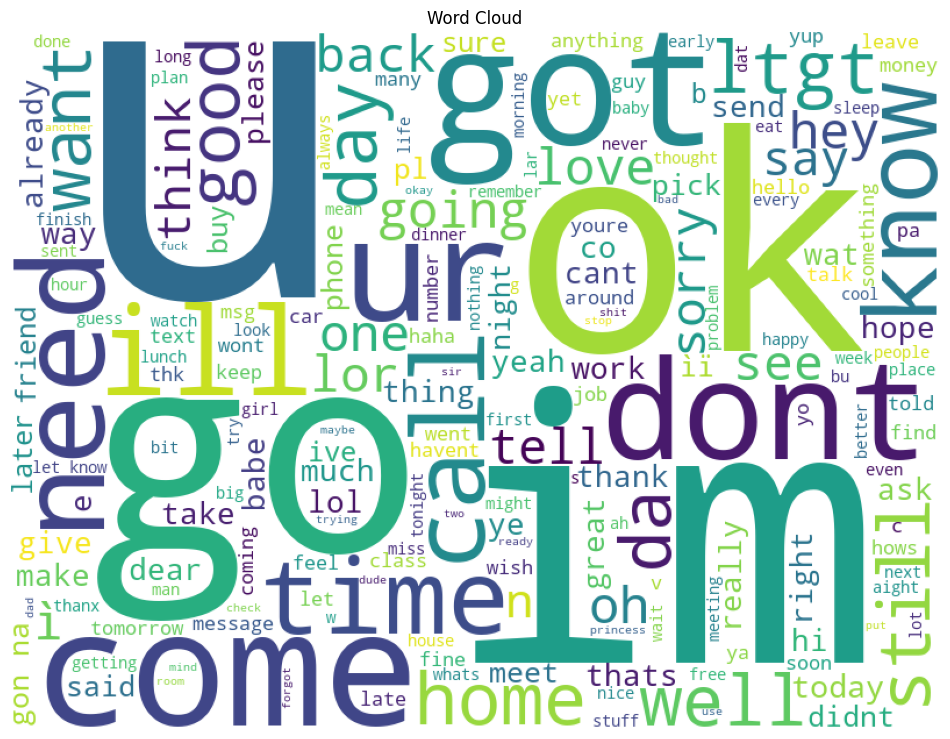

In [253]:
df_ham = df[df['spam'] == 0]

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Generate the word cloud
wordcloud.generate(df_ham['lemmatized_text'].to_string())

# Create a figure and display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud")
plt.show()

N-grams: Creating sequences of n words. Bigrams (2 words) and trigrams (3 words). N-grams can capture word relationships that single words might miss.

In [247]:
# N-grams

from nltk.util import ngrams

def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['bigrams'] = df['lemmatized'].apply(lambda x: extract_ngrams(x, 2))
df['trigrams'] = df['lemmatized'].apply(lambda x: extract_ngrams(x, 3))

df.head()

,spam,text,length,words,tokens_nltk,words_nltk,lemmatized,lemmatized_text,bigrams,trigrams
0,0,Go until jurong point crazy Available only in ...,102,20,"[go, jurong, point, crazy, available, bugis, n...",16,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,"[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,0,Ok lar Joking wif u oni,23,6,"[ok, lar, joking, wif, u, oni]",6,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,"[(ok, lar), (lar, joking), (joking, wif), (wif...","[(ok, lar, joking), (lar, joking, wif), (jokin..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,149,28,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,"[(free, entry), (entry, 2), (2, wkly), (wkly, ...","[(free, entry, 2), (entry, 2, wkly), (2, wkly,..."
3,0,U dun say so early hor U c already then say,43,11,"[u, dun, say, early, hor, u, c, already, say]",9,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,"[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,0,Nah I dont think he goes to usf he lives aroun...,59,13,"[nah, dont, think, goes, usf, lives, around, t...",8,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though,"[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [248]:
# Bag-of-Words (BoW)

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer
vectorizer.fit(df['lemmatized_text'])

# Transform the text to a bag-of-words vector
X = vectorizer.transform(df['lemmatized_text'])

# Convert the sparse matrix to a dense matrix
X = X.toarray()

X.shape

(5169, 8841)

In [249]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer
vectorizer.fit(df['lemmatized_text'])

# Transform the text to a TF-IDF vector
X = vectorizer.transform(df['lemmatized_text'])

# Convert the sparse matrix to a dense matrix
X = X.toarray()
